In [24]:
import math
import pandas as pd
from sklearn import metrics
from skopt import gp_minimize
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",200)

from IPython.core.pylabtools import figsize

figsize(20, 6)

In [3]:
train = pd.read_csv(r'../input/train.csv', encoding="UTF8").drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r'../input/test.csv', encoding="UTF8")

print(train.shape)
print(test.shape)

(13730, 166)
(4576, 47)


In [4]:
train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [5]:
test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A


In [6]:
nota = train['NU_NOTA_MT']
train = train[test.columns]
train['NU_NOTA_MT'] = nota
train.shape

(13730, 48)

In [7]:
numerical_train = train.select_dtypes(exclude = 'object').columns
numerical_test = test.select_dtypes(exclude = 'object').columns

In [8]:
train[numerical_train] = train.loc[:,numerical_train].fillna(0)
test[numerical_test] = test.loc[:,numerical_test].fillna(0)

In [9]:
insc_train = train['NU_INSCRICAO']
insc_test = test['NU_INSCRICAO']
nota = train['NU_NOTA_MT']

train = train.iloc[:,1:-1]
test = test.iloc[:, 1:]

In [10]:
dummies = pd.get_dummies(train.append(test))

In [11]:
rows = train.shape[0]

train = dummies.iloc[:rows]
test = dummies.iloc[rows:]

train['NU_NOTA_MT'] = nota
train['NU_INSCRICAO'] = insc_train
test['NU_INSCRICAO'] = insc_test

In [12]:
X = train.drop(['NU_NOTA_MT','NU_INSCRICAO'], axis = 1)
y = train['NU_NOTA_MT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
train.shape

(13730, 162)

In [14]:
scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [15]:
rf_mdl = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False)

In [16]:
rf_mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [17]:
y_pred = rf_mdl.predict(X_test)

In [18]:
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)

In [19]:
rf_scores = pd.DataFrame({'Random Forest Regressor' : [r2, rmse, mae]}, index=['R2', 'RMSE', 'MAE'])
rf_scores.to_csv('../results/rf_scores.csv', sep=';', index=False)
rf_scores

,Random Forest Regressor
R2,0.928320
RMSE,61.990871
MAE,41.311020


In [20]:
rf_mdl.score(X_test, y_test)

0.9283200970055174

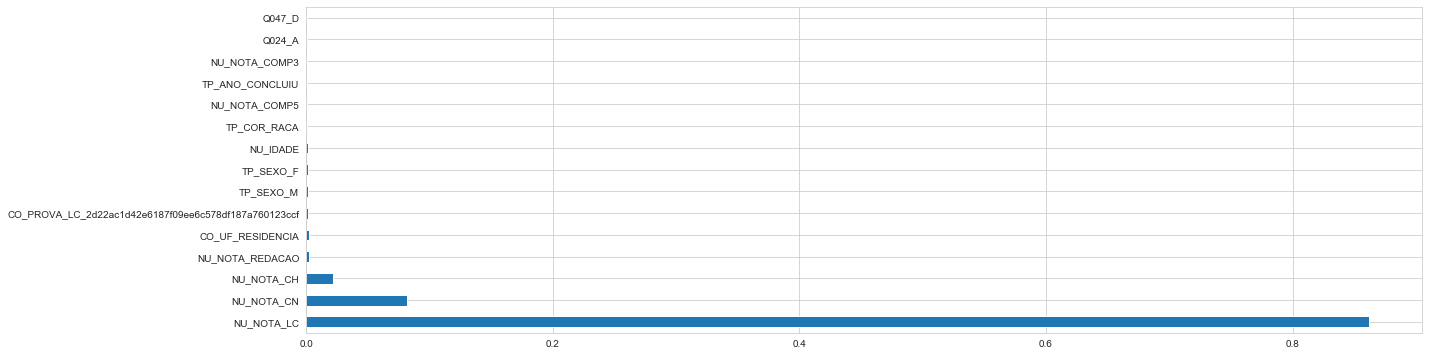

In [21]:
feat_importances = pd.Series(rf_mdl.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.savefig('../images/rf-features-importances.png')
plt.show();

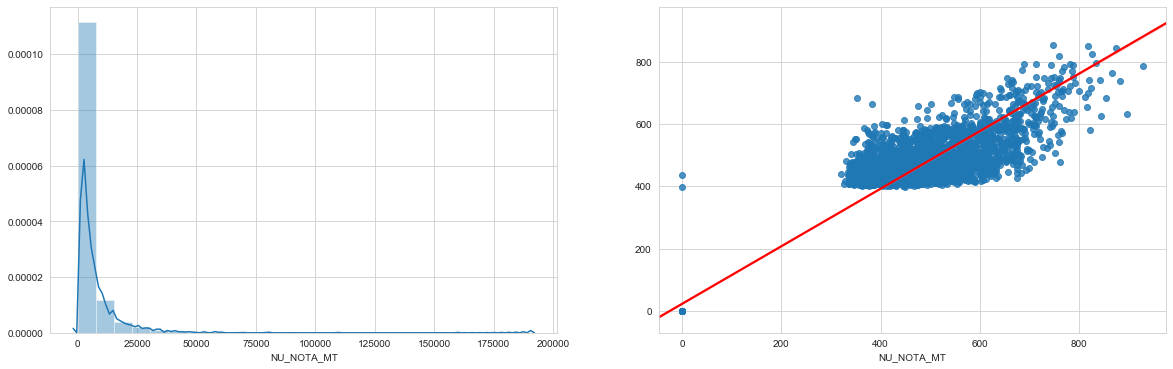

In [22]:
RSS = ((y_test - y_pred) **2 )

fig, ax =plt.subplots(1,2)
sns.distplot(RSS, bins= 25, hist_kws={'density':True}, ax=ax[0]);
sns.regplot(x = y_test , y = y_pred, line_kws={"color": "red"}, ax=ax[1]);
fig.show()

# Hyperparam Tunning

In [23]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. versionchanged:: 0.20
    

In [66]:
def fit_model(params):
   
    random_state = params[0]
    max_depth = params[1]
    min_impurity_split = params[2]
    min_samples_leaf = params[3]
    min_samples_split = params[4]
    min_weight_fraction_leaf = params[5]
    n_estimators = params[6]
    
    print(params, '\n')
    
    rf_mdl_2 = RandomForestRegressor(
           random_state = random_state,
           max_depth = max_depth,
           min_impurity_split = min_impurity_split,
           min_samples_leaf = min_samples_leaf,
           min_samples_split = min_samples_split,
           min_weight_fraction_leaf = min_weight_fraction_leaf,
           n_estimators = n_estimators,
           n_jobs=5,
           verbose=1,
           warm_start=False)
    
    rf_mdl_2.fit(X_train, y_train)
    
    y_pred = rf_mdl_2.predict(X_test)   
    
    r2 = metrics.r2_score(y_test, y_pred)
    rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    
    return r2

In [67]:
bounds = [(2, 200),       # random_state
          (10, 110),      # max_depth
          (1, 100),       # min_impurity_split
          (2, 8),         # min_samples_leaf
          (2, 15),        # min_samples_split
          (0, .5),    # min_weight_fraction_leaf
          (50, 2000)]     # n_estimators 

In [68]:
results_gp = gp_minimize(fit_model, 
                         bounds, 
                         random_state=1, 
                         verbose=1, 
                         n_calls=50, 
                         n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[199, 103, 14, 8, 5, 0.1982903636480131, 806] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done 806 out of 806 | elapsed:    6.7s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 806 out of 806 | elapsed:    0.2s finished


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.6282
Function value obtained: 0.9110
Current minimum: 0.9110
Iteration No: 2 started. Evaluating function at random point.
[135, 104, 85, 4, 9, 0.22172644688977838, 498] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 498 out of 498 | elapsed:    4.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 498 out of 498 | elapsed:    0.1s finished


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.6752
Function value obtained: 0.9098
Current minimum: 0.9098
Iteration No: 3 started. Evaluating function at random point.
[108, 101, 46, 5, 14, 0.38919461816826684, 1446] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done 1446 out of 1446 | elapsed:    5.7s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1446 out of 1446 | elapsed:    0.4s finished


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 7.0081
Function value obtained: 0.5745
Current minimum: 0.5745
Iteration No: 4 started. Evaluating function at random point.
[161, 19, 52, 7, 13, 0.4148016796970919, 582] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 582 out of 582 | elapsed:    2.5s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 582 out of 582 | elapsed:    0.1s finished


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.1110
Function value obtained: 0.5317
Current minimum: 0.5317
Iteration No: 5 started. Evaluating function at random point.
[14, 77, 60, 6, 7, 0.09877544899239063, 615] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    4.8s
[Parallel(n_jobs=5)]: Done 615 out of 615 | elapsed:    6.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 615 out of 615 | elapsed:    0.1s finished


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 7.1943
Function value obtained: 0.9147
Current minimum: 0.5317
Iteration No: 6 started. Evaluating function at random point.
[30, 88, 42, 2, 10, 0.3303178651190015, 632] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.5s
[Parallel(n_jobs=5)]: Done 632 out of 632 | elapsed:    3.7s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 632 out of 632 | elapsed:    0.1s finished


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 4.3902
Function value obtained: 0.7065
Current minimum: 0.5317
Iteration No: 7 started. Evaluating function at random point.
[90, 32, 8, 5, 3, 0.4516850832394338, 283] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 283 out of 283 | elapsed:    1.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 283 out of 283 | elapsed:    0.1s finished


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 1.6354
Function value obtained: 0.4773
Current minimum: 0.4773
Iteration No: 8 started. Evaluating function at random point.
[106, 18, 92, 7, 6, 0.29219456036896463, 1154] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 1154 out of 1154 | elapsed:    6.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1154 out of 1154 | elapsed:    0.3s finished


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 7.7097
Function value obtained: 0.7988
Current minimum: 0.4773
Iteration No: 9 started. Evaluating function at random point.
[124, 106, 27, 3, 9, 0.47496906926631993, 1011] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1011 out of 1011 | elapsed:    4.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1011 out of 1011 | elapsed:    0.3s finished


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 5.1011
Function value obtained: 0.4505
Current minimum: 0.4505
Iteration No: 10 started. Evaluating function at random point.
[109, 87, 5, 3, 12, 0.014900679091196637, 1772] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    3.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    9.3s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   16.8s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:   25.6s
[Parallel(n_jobs=5)]: Done 1772 out of 1772 | elapsed:   36.7s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1772 out of 1772 | elapsed:    0.6s finished


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 39.5369
Function value obtained: 0.9277
Current minimum: 0.4505
Iteration No: 11 started. Searching for the next optimal point.
[2, 110, 1, 8, 15, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 9.5035
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 12 started. Searching for the next optimal point.
[2, 10, 100, 8, 15, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 1.1861
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 13 started. Searching for the next optimal point.
[2, 110, 100, 8, 15, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.8s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    7.5s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    8.4s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 10.9775
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 14 started. Searching for the next optimal point.
[6, 25, 79, 8, 7, 0.4928531590147652, 747] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 747 out of 747 | elapsed:    3.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 747 out of 747 | elapsed:    0.2s finished


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 4.5219
Function value obtained: 0.4310
Current minimum: -0.0016
Iteration No: 15 started. Searching for the next optimal point.
[200, 110, 69, 2, 15, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 0.8457
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 16 started. Searching for the next optimal point.
[200, 10, 100, 8, 15, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.7s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.7s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.4s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 9.6225
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 17 started. Searching for the next optimal point.
[2, 10, 1, 2, 15, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    7.1s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.9s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 10.3669
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 18 started. Searching for the next optimal point.
[2, 10, 1, 8, 15, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 1.0582
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 19 started. Searching for the next optimal point.
[25, 88, 43, 7, 14, 0.5, 1145] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.5s
[Parallel(n_jobs=5)]: Done 1145 out of 1145 | elapsed:    4.7s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1145 out of 1145 | elapsed:    0.2s finished


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 6.5008
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 20 started. Searching for the next optimal point.
[200, 11, 1, 2, 14, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.5s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 9.6867
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 21 started. Searching for the next optimal point.
[153, 60, 20, 2, 2, 0.0, 393] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    9.6s
[Parallel(n_jobs=5)]: Done 393 out of 393 | elapsed:   20.0s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 393 out of 393 | elapsed:    0.2s finished


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 21.2474
Function value obtained: 0.9287
Current minimum: -0.0016
Iteration No: 22 started. Searching for the next optimal point.
[2, 110, 100, 2, 14, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 1.1028
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 23 started. Searching for the next optimal point.
[200, 110, 1, 8, 14, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 1.2186
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 24 started. Searching for the next optimal point.
[200, 48, 100, 2, 14, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.5s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 10.0554
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 25 started. Searching for the next optimal point.
[200, 10, 100, 2, 14, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 1.4930
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 26 started. Searching for the next optimal point.
[200, 110, 1, 2, 15, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 1.4869
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 27 started. Searching for the next optimal point.
[200, 10, 1, 8, 15, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 1.0713
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 28 started. Searching for the next optimal point.
[2, 10, 1, 8, 14, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 1.2483
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 29 started. Searching for the next optimal point.
[138, 14, 85, 4, 2, 0.5, 1886] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    9.5s
[Parallel(n_jobs=5)]: Done 1886 out of 1886 | elapsed:   10.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 1886 

Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 13.4970
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 30 started. Searching for the next optimal point.
[70, 96, 89, 4, 11, 0.1493541022587546, 1532] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    7.0s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   10.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:   15.9s
[Parallel(n_jobs=5)]: Done 1532 out of 1532 | elapsed:   19.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1532 out of 1532 | elapsed:    0.4s finished


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 22.7361
Function value obtained: 0.9086
Current minimum: -0.0016
Iteration No: 31 started. Searching for the next optimal point.
[180, 14, 75, 6, 12, 0.05596392916342843, 1461] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    6.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:   10.6s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:   16.3s
[Parallel(n_jobs=5)]: Done 1461 out of 1461 | elapsed:   19.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1461 out of 1461 | elapsed:    0.4s finished


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 21.0474
Function value obtained: 0.9229
Current minimum: -0.0016
Iteration No: 32 started. Searching for the next optimal point.
[41, 48, 11, 8, 5, 0.25743587103832166, 1920] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    4.6s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    7.2s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:   10.4s
[Parallel(n_jobs=5)]: Done 1920 out of 1920 | elapsed:   11.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1920 

Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 13.5891
Function value obtained: 0.8981
Current minimum: -0.0016
Iteration No: 33 started. Searching for the next optimal point.
[107, 33, 4, 8, 4, 0.3610829724915819, 1780] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.4s
[Parallel(n_jobs=5)]: Done 1780 out of 1780 | elapsed:    6.4s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1780 out of 1780 | elapsed:    0.5s finished


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 9.3113
Function value obtained: 0.6296
Current minimum: -0.0016
Iteration No: 34 started. Searching for the next optimal point.
[200, 110, 1, 8, 2, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.5s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 10.0095
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 35 started. Searching for the next optimal point.
[2, 110, 100, 2, 2, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 1.7538
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 36 started. Searching for the next optimal point.
[2, 10, 1, 2, 2, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 1.5133
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 37 started. Searching for the next optimal point.
[200, 110, 100, 8, 2, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 1.5215
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 38 started. Searching for the next optimal point.
[2, 110, 1, 2, 2, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    7.0s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    8.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 10.9864
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 39 started. Searching for the next optimal point.
[200, 10, 100, 8, 2, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.4s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 10.1026
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 40 started. Searching for the next optimal point.
[2, 10, 1, 8, 2, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 1.3243
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 41 started. Searching for the next optimal point.
[2, 108, 1, 2, 14, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.7s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.7s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.5s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 10.2202
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 42 started. Searching for the next optimal point.
[2, 10, 89, 2, 14, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 1.4390
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 43 started. Searching for the next optimal point.
[200, 10, 1, 2, 2, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 2.1552
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 44 started. Searching for the next optimal point.
[2, 110, 100, 8, 14, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.6s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.4s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 10.1873
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 45 started. Searching for the next optimal point.
[200, 110, 1, 8, 2, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 1.3756
Function value obtained: -0.0015
Current minimum: -0.0016
Iteration No: 46 started. Searching for the next optimal point.
[2, 110, 100, 2, 2, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.0s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.9s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    7.4s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    8.3s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 11.0698
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 47 started. Searching for the next optimal point.
[2, 10, 100, 8, 2, 0.5, 50] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed:    0.0s finished


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 1.4599
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 48 started. Searching for the next optimal point.
[2, 10, 100, 8, 14, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    2.9s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    4.5s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    7.6s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 10.5021
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 49 started. Searching for the next optimal point.
[200, 10, 100, 2, 2, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.4s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    7.5s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    8.4s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 11.2796
Function value obtained: -0.0016
Current minimum: -0.0016
Iteration No: 50 started. Searching for the next optimal point.
[200, 110, 1, 8, 2, 0.5, 2000] 



[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.9s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    3.3s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    7.3s
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:    8.1s finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 2000 

Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 11.1210
Function value obtained: -0.0016
Current minimum: -0.0016


In [62]:
results_gp.x

[115, 110, 100, 8, 7, 0.5, 831]